In [214]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

In [215]:
data = pd.read_csv('Telco_Cusomer_Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [216]:
df = data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [218]:
# removing customer id 

In [219]:
df.drop('customerID', axis = 1, inplace = True)

In [220]:
# Cleaning TotalCharges column ( It is numeric but due to spaces in the column )

In [221]:
space_index = df[df['TotalCharges'].str.contains(' ')].index

In [222]:
for i in space_index:
    df.loc[i,'TotalCharges'] = 0

In [223]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [224]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [225]:
# Check dataype and treat if any

In [226]:
df['SeniorCitizen'] =df['SeniorCitizen'].astype(object)

In [227]:
# Null values

In [228]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [229]:
# seperate num and cat

In [230]:
num = df.select_dtypes(include=np.number).columns.to_list()
cat = df.select_dtypes(include=object).columns.to_list()

In [231]:
# STATS SUMMARY

In [232]:
df[num].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [233]:
df[cat].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [234]:
# Target analysis

In [235]:
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

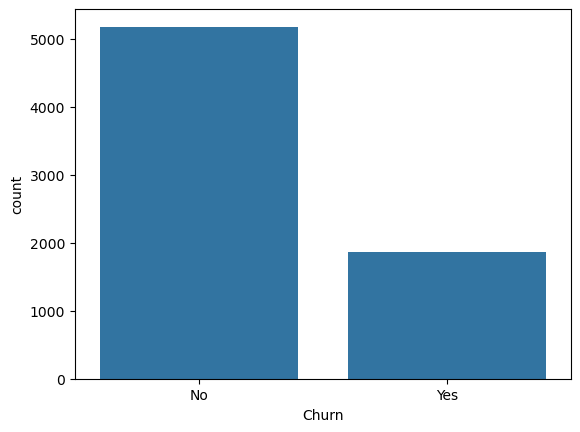

In [236]:
sns.countplot(x=df['Churn'])
plt.show()

In [237]:
# DO UNIVARITAE, BIVARIATE AND MULTIVARIATE

In [238]:
# ENCODING

In [239]:
for i in cat:
    print(i)
    print(df[i].unique())
    print()

gender
['Female' 'Male']

SeniorCitizen
[0 1]

Partner
['Yes' 'No']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No phone service' 'No' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['No' 'Yes' 'No internet service']

StreamingTV
['No' 'Yes' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn
['No' 'Yes']



In [240]:
# using label for all categoric column

In [241]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [323]:
for i in cat:
    df[i] = l.fit_transform(df[[i]])

In [243]:
# Train Test Split

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
x = df.drop('Churn', axis = 1)
y = df[['Churn']]

In [246]:
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=5, stratify=y)

In [247]:
# stratify=y -> maintain same proportion in training and testing data

In [248]:
ytrain.value_counts(normalize=True)*100

Churn
0        73.464679
1        26.535321
Name: proportion, dtype: float64

In [249]:
ytest.value_counts(normalize=True)*100

Churn
0        73.456352
1        26.543648
Name: proportion, dtype: float64

In [250]:
# Base Model

In [251]:
import statsmodels.api as sma

In [252]:
model1 = sma.Logit(ytrain, xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.419183
         Iterations 8


In [253]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5615
Method:                           MLE   Df Model:                           18
Date:                Thu, 18 Sep 2025   Pseudo R-squ.:                  0.2755
Time:                        21:51:04   Log-Likelihood:                -2361.7
converged:                       True   LL-Null:                       -3259.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
gender              -0.0588      0.071     -0.832      0.406      -0.197       0.080
SeniorCitizen        0.2440      0.094      2.599      0.009       0.060       0.428
Partner             -0.0228      0.086     -0.264      0.791      -0.192       0.146
Dependents          -0.1683      0.100     -1.687      0.092      -0.364       0.027
tenure              -0.0642      0.006    -11.069      0.000      -0.076      -0.053
PhoneService        -1.1949      0.152     -7.870      0.000      -1.492      -0.897
MultipleLines        0.0382      0.045      0.846      0.398      -0.050       0.127
InternetService      0.2313      0.073      3.148      0.002       0.087       0.375
OnlineSecurity      -0.2844      0.046     -6.214      0.000      -0.374      -0.195
OnlineBackup        -0.1393      0.042     -3.314      0.001      -0.222      -0.057
DeviceProtection    -0.1070      0.044     -2.449      0.014      -0.193      -0.021
TechSupport         -0.2777      0.046     -6.027      0.000      -0.368      -0.187
StreamingTV         -0.0271      0.046     -0.590      0.555      -0.117       0.063
StreamingMovies      0.0060      0.046      0.132      0.895      -0.083       0.095
Contract            -0.7124      0.086     -8.302      0.000      -0.881      -0.544
PaperlessBilling     0.2971      0.081      3.650      0.000       0.138       0.457
PaymentMethod       -0.0081      0.035     -0.231      0.817      -0.076       0.060
MonthlyCharges       0.0213      0.002      9.713      0.000       0.017       0.026
TotalCharges         0.0004   6.38e-05      6.003      0.000       0.000       0.001
====================================================================================
"""

In [254]:
yprob = model1.predict(xtest)

In [255]:
ypred1 = (yprob > 0.5).astype(int)

In [256]:
ypred1

4187    0
638     0
2791    0
1607    1
2666    0
       ..
972     0
52      0
6391    0
203     1
2287    0
Length: 1409, dtype: int64

In [257]:
# metric

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [258]:
summary = pd.DataFrame(columns=['Name', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'F1_score_weig'])

In [259]:
def metrics(name,ytest,ypred):
    global summary 
    new = pd.DataFrame({
        'Name':[name],
        'Accuracy':[accuracy_score(ytest,ypred)],
        'Precision':[precision_score(ytest,ypred)],
        'Recall':[recall_score(ytest,ypred)],
        'F1_score':[f1_score(ytest,ypred)],
        'F1_score_weig':[f1_score(ytest,ypred,average='weighted')]})
    summary = pd.concat([summary,new],ignore_index=True)
    return summary

In [260]:
metrics('Logit', ytest, ypred1)

,Name,Accuracy,Precision,Recall,F1_score,F1_score_weig
0,Logit,0.79489,0.640264,0.518717,0.573117,0.787536


In [261]:
#Logistic 

In [262]:
from sklearn.linear_model import LogisticRegression

In [263]:
log = LogisticRegression()

In [264]:
log.fit(xtrain,ytrain)

LogisticRegression()

In [265]:
ypred2 = log.predict(xtest)

In [266]:
metrics('Logistic Regression', ytest, ypred2)

,Name,Accuracy,Precision,Recall,F1_score,F1_score_weig
0,Logit,0.794890,0.640264,0.518717,0.573117,0.787536
1,Logistic Regression,0.789922,0.629139,0.508021,0.562130,0.782265


In [267]:
# Decision Tree Classification 

In [268]:
from sklearn.tree import DecisionTreeClassifier

In [269]:
dt = DecisionTreeClassifier(max_depth=5, random_state=10)

In [270]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [271]:
ypred3= dt.predict(xtest)

In [272]:
metrics('Decision Tree (Pruned)', ytest, ypred3)

,Name,Accuracy,Precision,Recall,F1_score,F1_score_weig
0,Logit,0.794890,0.640264,0.518717,0.573117,0.787536
1,Logistic Regression,0.789922,0.629139,0.508021,0.562130,0.782265
2,Decision Tree (Pruned),0.781405,0.635246,0.414439,0.501618,0.764872


In [273]:
# Random Forest Classification 

In [274]:
from sklearn.ensemble import RandomForestClassifier

In [275]:
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=10)

In [276]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=10)

In [277]:
ypred4= rf.predict(xtest)

In [278]:
metrics('Random Forest (Pruned)', ytest, ypred4)

,Name,Accuracy,Precision,Recall,F1_score,F1_score_weig
0,Logit,0.794890,0.640264,0.518717,0.573117,0.787536
1,Logistic Regression,0.789922,0.629139,0.508021,0.562130,0.782265
2,Decision Tree (Pruned),0.781405,0.635246,0.414439,0.501618,0.764872
3,Random Forest (Pruned),0.784244,0.656250,0.393048,0.491639,0.764474


In [279]:
# Adaboost Classification 

In [280]:
from sklearn.ensemble import AdaBoostClassifier

In [281]:
ad = AdaBoostClassifier(n_estimators=50, random_state=10)

In [282]:
ad.fit(xtrain,ytrain)

AdaBoostClassifier(random_state=10)

In [283]:
ypred5= ad.predict(xtest)

In [284]:
metrics('Ada Boosting(Pruned) ', ytest, ypred5)

,Name,Accuracy,Precision,Recall,F1_score,F1_score_weig
0,Logit,0.794890,0.640264,0.518717,0.573117,0.787536
1,Logistic Regression,0.789922,0.629139,0.508021,0.562130,0.782265
2,Decision Tree (Pruned),0.781405,0.635246,0.414439,0.501618,0.764872
3,Random Forest (Pruned),0.784244,0.656250,0.393048,0.491639,0.764474
4,Ada Boosting(Pruned),0.798439,0.649007,0.524064,0.579882,0.791092


In [324]:
# from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# from sklearn.naive_bayes import 

In [285]:
# Gradian Bossting Classification 

In [286]:
from sklearn.ensemble import GradientBoostingClassifier

In [287]:
gb = GradientBoostingClassifier(n_estimators=50, random_state=10)

In [288]:
gb.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=50, random_state=10)

In [289]:
ypred6= gb.predict(xtest)

In [290]:
metrics('Gradient Booosting (Pruned) ', ytest, ypred6)

,Name,Accuracy,Precision,Recall,F1_score,F1_score_weig
0,Logit,0.794890,0.640264,0.518717,0.573117,0.787536
1,Logistic Regression,0.789922,0.629139,0.508021,0.562130,0.782265
2,Decision Tree (Pruned),0.781405,0.635246,0.414439,0.501618,0.764872
3,Random Forest (Pruned),0.784244,0.656250,0.393048,0.491639,0.764474
4,Ada Boosting(Pruned),0.798439,0.649007,0.524064,0.579882,0.791092
5,Gradient Booosting (Pruned),0.792761,0.654135,0.465241,0.543750,0.780413


In [291]:
# XG Bossting Classification 

In [292]:
!pip install xgboost

In [293]:
from xgboost import XGBRFClassifier

In [294]:
xg = XGBRFClassifier(n_estimators=50, random_state=10)

In [295]:
xg.fit(xtrain,ytrain)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, feature_weights=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=50, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=10, ...)

In [296]:
ypred7= xg.predict(xtest)

In [297]:
metrics('XG Booosting (Pruned) ', ytest, ypred7)

,Name,Accuracy,Precision,Recall,F1_score,F1_score_weig
0,Logit,0.794890,0.640264,0.518717,0.573117,0.787536
1,Logistic Regression,0.789922,0.629139,0.508021,0.562130,0.782265
2,Decision Tree (Pruned),0.781405,0.635246,0.414439,0.501618,0.764872
3,Random Forest (Pruned),0.784244,0.656250,0.393048,0.491639,0.764474
4,Ada Boosting(Pruned),0.798439,0.649007,0.524064,0.579882,0.791092
5,Gradient Booosting (Pruned),0.792761,0.654135,0.465241,0.543750,0.780413
6,XG Booosting (Pruned),0.787083,0.620130,0.510695,0.560117,0.780070


In [298]:
# Hyperparameter tuning in Random Forest

In [299]:
from sklearn.model_selection import GridSearchCV

In [300]:
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 75, 100],       
    'max_depth': [5,6,7],        
    'min_samples_split': [2, 5]  }     

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)

In [301]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 75, 100]})

In [302]:
best_rf = grid_search.best_estimator_
print(best_rf)

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=42)


In [303]:
ypred8 = best_rf.predict(xtest)

In [304]:
metrics('Tuned Random Forest', ytest, ypred8)

,Name,Accuracy,Precision,Recall,F1_score,F1_score_weig
0,Logit,0.794890,0.640264,0.518717,0.573117,0.787536
1,Logistic Regression,0.789922,0.629139,0.508021,0.562130,0.782265
2,Decision Tree (Pruned),0.781405,0.635246,0.414439,0.501618,0.764872
3,Random Forest (Pruned),0.784244,0.656250,0.393048,0.491639,0.764474
4,Ada Boosting(Pruned),0.798439,0.649007,0.524064,0.579882,0.791092
5,Gradient Booosting (Pruned),0.792761,0.654135,0.465241,0.543750,0.780413
6,XG Booosting (Pruned),0.787083,0.620130,0.510695,0.560117,0.780070
7,Tuned Random Forest,0.792051,0.668050,0.430481,0.523577,0.775843


In [305]:
# GaussianNB

In [306]:
from sklearn.naive_bayes import GaussianNB

In [307]:
gnb = GaussianNB()

gnb.fit(xtrain, ytrain)

ypred9 = gnb.predict(xtest)

In [308]:
metrics('GaussianNB', ytest, ypred9)

,Name,Accuracy,Precision,Recall,F1_score,F1_score_weig
0,Logit,0.794890,0.640264,0.518717,0.573117,0.787536
1,Logistic Regression,0.789922,0.629139,0.508021,0.562130,0.782265
2,Decision Tree (Pruned),0.781405,0.635246,0.414439,0.501618,0.764872
3,Random Forest (Pruned),0.784244,0.656250,0.393048,0.491639,0.764474
4,Ada Boosting(Pruned),0.798439,0.649007,0.524064,0.579882,0.791092
5,Gradient Booosting (Pruned),0.792761,0.654135,0.465241,0.543750,0.780413
6,XG Booosting (Pruned),0.787083,0.620130,0.510695,0.560117,0.780070
7,Tuned Random Forest,0.792051,0.668050,0.430481,0.523577,0.775843
8,GaussianNB,0.761533,0.536965,0.737968,0.621622,0.771682


In [309]:
# Hyperparameter tunning - Adaboost

In [310]:
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=10)

In [311]:
ada_boost = AdaBoostClassifier(estimator=base_estimator, random_state=10)

In [312]:
param_grid = {'n_estimators': [50, 100],           
    'learning_rate': [0.01, 0.1, 1.0] } 

In [313]:
grid_search_ada = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=3)

In [314]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 75, 100]})

In [315]:
best_ada_boost = grid_search.best_estimator_
ypred10 = best_ada_boost.predict(xtest)

In [316]:
metrics('Tuned Ada Boost', ytest, ypred10)

,Name,Accuracy,Precision,Recall,F1_score,F1_score_weig
0,Logit,0.794890,0.640264,0.518717,0.573117,0.787536
1,Logistic Regression,0.789922,0.629139,0.508021,0.562130,0.782265
2,Decision Tree (Pruned),0.781405,0.635246,0.414439,0.501618,0.764872
3,Random Forest (Pruned),0.784244,0.656250,0.393048,0.491639,0.764474
4,Ada Boosting(Pruned),0.798439,0.649007,0.524064,0.579882,0.791092
5,Gradient Booosting (Pruned),0.792761,0.654135,0.465241,0.543750,0.780413
6,XG Booosting (Pruned),0.787083,0.620130,0.510695,0.560117,0.780070
7,Tuned Random Forest,0.792051,0.668050,0.430481,0.523577,0.775843
8,GaussianNB,0.761533,0.536965,0.737968,0.621622,0.771682
9,Tuned Ada Boost,0.792051,0.668050,0.430481,0.523577,0.775843


In [317]:
summary.sort_values(by = ['F1_score_weig'], ascending=False)

,Name,Accuracy,Precision,Recall,F1_score,F1_score_weig
4,Ada Boosting(Pruned),0.798439,0.649007,0.524064,0.579882,0.791092
0,Logit,0.794890,0.640264,0.518717,0.573117,0.787536
1,Logistic Regression,0.789922,0.629139,0.508021,0.562130,0.782265
5,Gradient Booosting (Pruned),0.792761,0.654135,0.465241,0.543750,0.780413
6,XG Booosting (Pruned),0.787083,0.620130,0.510695,0.560117,0.780070
7,Tuned Random Forest,0.792051,0.668050,0.430481,0.523577,0.775843
9,Tuned Ada Boost,0.792051,0.668050,0.430481,0.523577,0.775843
8,GaussianNB,0.761533,0.536965,0.737968,0.621622,0.771682
2,Decision Tree (Pruned),0.781405,0.635246,0.414439,0.501618,0.764872
3,Random Forest (Pruned),0.784244,0.656250,0.393048,0.491639,0.764474


In [318]:
summary1=pd.DataFrame(columns=['Name','Accuracy','Presicion','Recall','F1 score'])

In [319]:
def metrics(name,ypred,ytest):
    global summary1
    new1=pd.DataFrame({
        'Name':[name],
        'Accuracy':[accuracy_score(ypred,ytest)],
        'Presicion':[precision_score(ypred,ytest)],
        'Recall':[recall_score(ypred,ytest)],
        'F1 score':[f1_score(ypred,ytest)]
    })
    summary1=pd.concat([summary1,new1],ignore_index=True)
    return summary1

In [321]:
metrics('Random Forest (Pruned)',ypred4,ytest)

,Name,Accuracy,Presicion,Recall,F1 score
0,Random Forest (Pruned),0.784244,0.393048,0.65625,0.491639


In [326]:
from sklearn.metrics import *

In [327]:
summary_reg=pd.DataFrame(columns=['Name','R2 score','MSE','RMSE'])

In [328]:
def metrics(name,ytest,ypred):
    global summary_reg
    new_r=pd.DataFrame({
        'Name':[name],
        'R2 score': [r2_score(ypred,ytest)],
        'MSE':[mean_squared_error(ypred,ytest)],
        'RMSE':[np.sqrt(mean_squared_error(ypred,ytest))]
    })
    summary_reg=pd.concat([summary_reg,new_r],ignore_index=True)
    return summary_reg

In [ ]:
metrics('')